**<center> <span style="color:#0F52BA;font-family:serif; font-size:32px;"> Let's Dive Into Student Performance 📈</span> </center>**

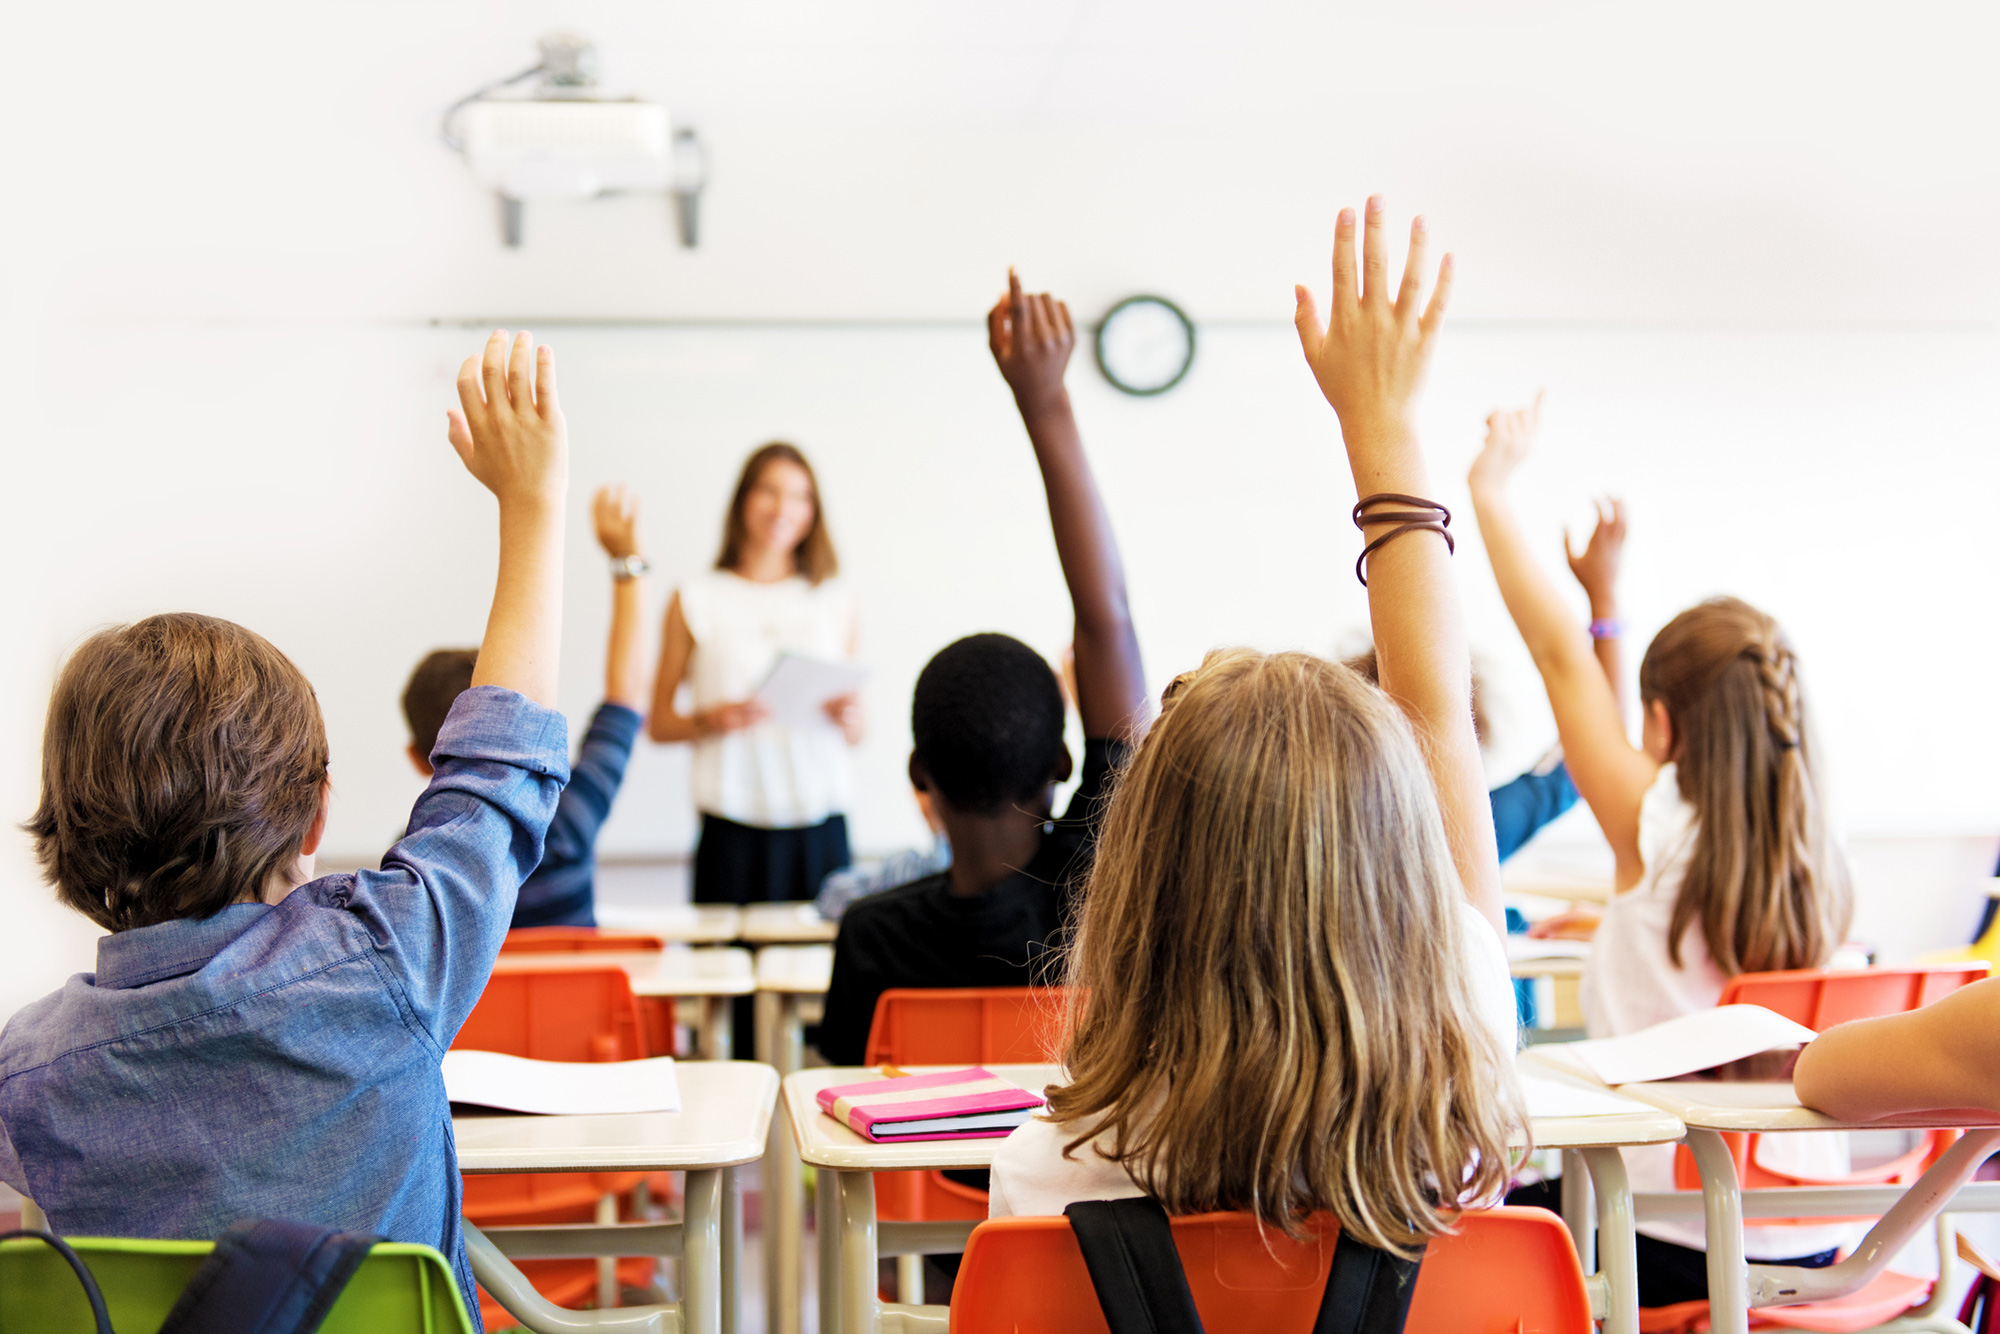

# <span style="font-family:serif; font-size:28px;"> Content</span>

1. [Introduction](#1)
    * [Why is it important to analyze student performance?](#2)
2. [Loading libraries and data](#3)  
3. [Quick look at the data](#4)
    * [Data](#5)
    * [Attribute Information ](#6)
4. [Visualize missing values](#7)
5. [Data Preparation](#8)
    * [Creating new columns](#9)
    * [Grading System](#10)
6. [Data Visualization](#11)
    

<a id = "1" ></a>
# <span style="color:#0F52BA;font-family:serif;">1. Introduction </span>

This data set consists of the marks secured by the students in various subjects.
Let's try to understand the influence of the parents background, test preparation etc on students performance.

<a id = "introduction" ></a>

<a id = "2" ></a>
# <span style="color:#0F52BA;font-family:serif;">  Why is it important to analyze student performance? </span>
 
> Analyzing student work is an essential part of teaching. Teachers assign, collect and examine student work all the time to assess student learning and to revise and improve teaching. Ongoing assessment of student learning allows teachers to engage in continuous quality improvement of their courses. Many factors can influence a student's performance, including the influence of the parents' educational background, test preparation, student health, and so on.

 <span style="color:crimson;font-family:serif; font-size:24px;"> Let's get started! </span>
 <a id="importance"></a>

<a id = "3" ></a>
# <span style="font-family:serif; font-size:28px;"> 2. Loading libraries and data</span>
 <a id="loading"></a>

In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")

***

<a id = "4" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Quick look at the data</span>
<a id = "quicklook" ></a>

In [ ]:
df.shape

In [ ]:
df.info()

<a id = "5" ></a>
Let's take a look at our data
<a id = "dflook" ></a>

In [ ]:
df

In [ ]:
df.columns

<a id = "6" ></a>
<h2 style="text-align:center;">Attribute Information</h2>
   <table style="width:100%">
     <tr>
       <th>Column Name</th>
       <th>Description</th>
    </tr>
    <tr>
       <td>gender</td>
       <td>Male/ Female</td>
    </tr>
     <tr>
    <td>race/ethnicity</td>
    <td>Group division from A to E</td>
  </tr>
  <tr>
    <td>parental level of education</td>
    <td>Details of parental education varying from high school to master's degree </td>
  </tr>
    <tr>
    <td>lunch</td>
    <td>Type of lunch selected</td>
  </tr>
    <tr>
    <td>test preparation course</td>
    <td>Course details</td>
  </tr>
    <tr>
    <td>math score</td>
    <td>Marks secured by a student in Mathematics</td>
  </tr>
    <tr>
    <td>reading score</td>
    <td>Marks secured by a student in Reading</td>
  </tr>
    <tr>
    <td>writing score</td>
    <td>Marks secured by a student in Writing</td>
  </tr>
</table>
<a id = "attribute" ></a>

***

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Visualize missing values </span>
<a id = "missingvalue" ></a>

In [ ]:
msno.matrix(df);

> **Using this matrix you can very quickly find the pattern of missingness in the dataset.
From the above visualisation we can observe that no peculiar pattern can be found!**

In [ ]:
df.isna().sum()

> **There are no missing values in our dataset!**

***

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Data Prep </span>
<a id = "8" ></a>

For a particular course, the total marks is 100. So let's set passmark has 35 marks.

In [ ]:
#initializing the passmarks
passmark=35

<a id = "9" ></a>
Let's create  three new columns: `Total_Marks`, `Percentage` and `grade`
<a id = "9" ></a>

In [ ]:
 
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3

<a id = "10" ></a>
<center> <span style="font-family:serif; font-size:24px;"> Grading System </span> </center>

| Percentage Range | Grade | Qualification |
| --- | --- | --- |
| >= 95 | O | Outstanding |
| >= 81 | A | Very Good |
| >= 71 | B | Good |
| >= 61 | C | Average |
| >= 51 | D | Sufficient |
| >= 41 | E | Passable |
| < 41 | F | Fail |

<a id = "10" ></a>

In [ ]:

def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)

In [ ]:
df.head(10)

In [ ]:
df.describe()

***

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Data Visualization </span>
<a id = "datavisualization" ></a>

In [ ]:
sns.set(style='whitegrid')

In [ ]:
plt.figure(figsize=(14, 7))
labels=['Female', 'Male']
plt.pie(df['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

* Out of the total number of students, 51.89% are females while 48.20% are males.
 

In [ ]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="grade", hue="gender", data=df, order=["O","A","B","C","D","E","F"])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
labels =["O","A","B","C","D","E","F"]
values = [22,157,255,258,188,86,34]
labels_gender = ["F","M","F","M","F","M","F","M","F","M","F","M","F","M"]
sizes_gender = [19,3,91,66,145,110,131,127,85,103,29,57,18,16]
colors = ['orchid', '#ff6666', 'aquamarine', '#66b3ff','chocolate','gold','orange']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3,0.3,0.3,0.3,0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%' ,pctdistance=0.92, labeldistance=0.80,colors=colors, startangle=90,frame=True, explode=explode,radius=12)
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7)
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Grade Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, fontweight='bold',y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

From the above visualization we infer:
* The majority of students who earned an O grade were female.
* Majority of students received B grade followed by C.
* More female students received A and B Grade relative to male students.
* More number of boys received D and E grade.
* Almost similar number of both, male and female, got F grade.

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)

corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
sns.heatmap(df.corr(),mask=mask,annot=True,linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

* Almost all the scores are close to each other. There is average success in all three course.

In [ ]:
sns.set_context("paper",font_scale=1)
sns.kdeplot(data=df,shade = True)
plt.xlabel('Score')
plt.title('Score Kde Plot', fontsize=15, fontweight='bold')
plt.show()

In [ ]:

sns.set_context("notebook")
sns.jointplot(data=df, x="math score", y="reading score", hue="gender", kind="kde")
plt.title('Reading and Mathematics score vs Gender', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* We can see the relationship between reading and mathematical score and their gender distribution.

In [ ]:
sns.set_palette("husl", 9)
sns.jointplot(
    data=df, x="writing score", y="math score",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)
plt.title('Mathematics and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* Most students fall between the range of 40 to 85 marks in both the courses, mathematics and writing.

In [ ]:
sns.set_palette("plasma")
sns.jointplot(data=df, x="writing score", y="reading score", kind="hex")
plt.title('Reading and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* The average score in both courses, reading and writing, is around 70.

In [ ]:
sns.set_palette("Pastel1")
sns.jointplot(data=df, x="Percentage", y="math score", kind="reg")
plt.title('Percentage and Mathematics score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* We can find that in the relationship between the percentage and the mathematics score, most student have scored in the range of 50 to 80. 

In [ ]:
sns.set_palette("Set2")
g = sns.JointGrid()
x, y = df["Percentage"], df["writing score"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=100, linewidth=1.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)
plt.title('Percentage and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* From the above visualization, we infer that most student have scored in the range of 60 to 80 which is constituting to the overall percentage as well.

In [ ]:
sns.set_context("notebook")
sns.set_palette("pastel")
g = sns.JointGrid(data=df, x="Percentage", y="reading score")
g.plot(sns.regplot, sns.boxplot)
plt.title('Percentage and Reading score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* We can conclude that most students have a good reading score, except a few.

In [ ]:
sns.set_context("talk",font_scale=0.5)
sns.set_palette("Pastel2")
sns.kdeplot(data=df, x="Percentage", hue="test preparation course", multiple="stack")
plt.title('Percentage vs Test Preparation',fontsize=15, fontweight='bold')

plt.show()

In [ ]:
sns.set_palette("Pastel1")
g = sns.JointGrid(data=df, x="Percentage", y="math score", hue="test preparation course")
g.plot(sns.scatterplot, sns.histplot)
plt.title('Percentage and Mathematics score vs Test Preparation ', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()


From the above visualization we can infer that :
* Students who have completed their test preparations have definitely scored better. 
* While a few students who did not complete their test preparations have not performed so well.

* We can notice that there are few who have scored exceptionally good compared to others even when they did not complete their test perparation.

* Also, there are very few who completed their test preparation but still scored low percentage.

(We always have few exceptions.)

In [ ]:
sns.set_context("notebook",font_scale=0.8)
sns.kdeplot(data=df, x="Percentage", hue="lunch", multiple="layer",fill=True)
plt.xlabel('Percentage')
plt.title('Percentage vs Lunch Kde Plot',fontsize=15, fontweight='bold')

plt.show()

In [ ]:
sns.set_palette("tab10")
g = sns.JointGrid(data=df, x="Percentage", y="writing score", hue="lunch")
g.plot(sns.scatterplot, sns.histplot)
plt.title('Percentage and Writing score vs Lunch', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()


Notice the range  75 to 100 in the above visualization.
* Students who had the standard lunch have performed very well.
* Students who had the free/reduced lunch have not performed so well.

It is very evident that food and nutriention play a vital role in the growth of a student both, physically and academically. Nutrition plays a key role in the healthy development of the children. Nutritious foods provide the body and mind with the energy needed to grow, feel well, be active, stay healthy and learn. Students are able to learn better when they're well nourished, and eating healthy meals has been linked to higher grades, better memory and alertness, and faster information processing.

Healthy students are better learners. 

In [ ]:
df[(df['race/ethnicity']=='group B')]

In [ ]:
df["grade"].value_counts()


In [ ]:
df["grade"].index.sort_values()

In [ ]:
df[df['grade']=='F'].groupby('gender').count()


In [ ]:
df["race/ethnicity"].value_counts()

In [ ]:
sns.set_context("notebook",font_scale=1)

sns.kdeplot(
   data=df, x="Percentage", hue="gender",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.title('Percentage Distribution w.r.t. Gender',fontsize=15, fontweight='bold')

plt.show()

* From the visualization above, it is quite evident that the female students have performed exceptionally well!

In [ ]:
df.columns

In [ ]:
sns.set_palette("Dark2")
sns.set_context("notebook",font_scale=1)
sns.kdeplot(
    data=df, x="Percentage", hue="parental level of education",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.title('Percentage vs Parental Level Of Education',fontsize=15, fontweight='bold')

plt.show()

* Students whose parents hold a master's degree have a higher overall percentage. 
* Students whose parental education level is 'high school' and 'some high school' have lower overall percentage.

In [ ]:

sns.catplot(x="parental level of education", y="Percentage", hue="gender",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=df)
plt.title('Parental Education Distribution vs Gender',fontsize=15, fontweight='bold')
plt.xticks(rotation=60)
plt.show()

* Females whose parents hold a Bachelor's degree, followed by master's degree,are more successful.
* Males whose parents hold a Bachelor's degree and master's degree have similar academic performance

In [ ]:
race = ['Group A', 'Group B ', 'Group C',  
        'Group D', 'Group E'] 
  
data = [89, 190, 319, 262, 140] 
  
  
# Creating explode data 
explode = ( 0.1, 0,0.2, 0.1, 0) 
  
# Creating color parameters 
colors = (  "#ffd11a", "#b463cf", 
          "#DC143C", "#6699ff", "#ff66b3" ) 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "#cccccc" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} )".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = race, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="#000000")) 
  
# Adding legend 
ax.legend(wedges, race, 
          title ="Race/Ethnicity", 
          loc ="center left", 
          bbox_to_anchor =(1.25, 0, 0, 1.25)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Race/Ethnicity Distribution", fontsize=15, fontweight='bold') 
  
# show plot 
plt.show()

In [ ]:
sns.set_palette("Set2")
(sns.FacetGrid(df,hue="race/ethnicity", height=5,xlim = (0,100)).map(sns.kdeplot, "Percentage").add_legend())
plt.title('Percentage Distribution w.r.t. Race/ethnicity',fontsize=15, fontweight='bold')

plt.show()

* Performance of Group E is the best among all. While group D and C have nearly similar performance.

In [ ]:
sns.set_palette("vlag")
sns.catplot(x="race/ethnicity", y="Percentage", kind="boxen",
            data=df.sort_values("race/ethnicity"))
plt.title('Race/ethnicity vs Percentage',fontsize=15, fontweight='bold')

plt.show()

* The average of group E is highest among all the groups while the average of group A is lowest.

In [ ]:
plt.figure(figsize=(5,5))
labels=['Math Score', 'Reading Score', 'Writing Score']
colors=['#ff6666','orchid','#66b3ff']
explode=[0,0.1,0]
values=[df["math score"].mean(),df["reading score"].mean(),df["writing score"].mean()]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True,startangle=180,pctdistance=0.5)
plt.legend(['Math Score', 'Reading Score', 'Writing Score'],loc='lower right')
plt.axis('equal')
plt.title(' Overall Mean Score  ',fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

* Reading Score has the highest average.

In [ ]:
sns.set_palette("flare")
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [ ]:
sns.set_palette("crest")
df.groupby('race/ethnicity').agg('mean').plot(kind='barh',figsize=(9,9))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [ ]:
sns.set_palette("coolwarm")
df.groupby(['race/ethnicity','gender']).agg('mean').plot(kind='bar',figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

<span style="color:crimson;font-family:serif; font-size:20px;">  Please upvote if you liked the kernel! 😀
    <p style="color:royalblue;font-family:serif; font-size:20px;">KEEP KAGGLING!</p> 
</span>